<a href="https://colab.research.google.com/github/AmbujaShetty/WoTech-Python/blob/main/WoTech-Python/8Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pokemon_df = pd.read_csv('/content/Pokemon.csv')
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


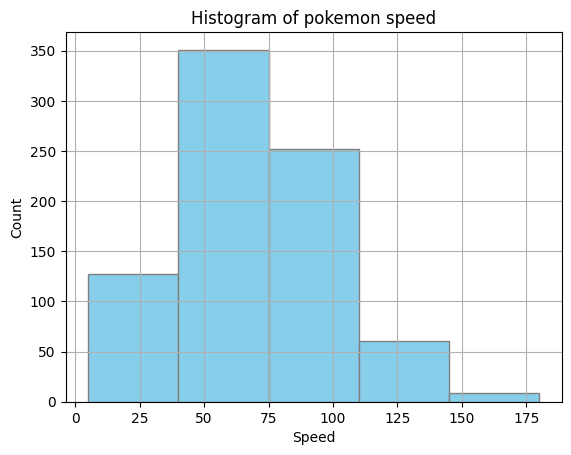

In [ ]:
pokemon_df['Speed'].hist(bins=5, color='skyblue', edgecolor = "gray")
plt.xlabel('Speed')
plt.ylabel('Count')
plt.title('Histogram of pokemon speed')
plt.show()

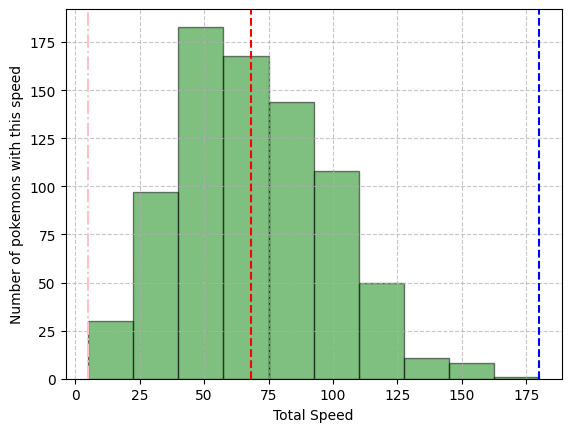

In [ ]:
plt.hist(pokemon_df['Speed'], color='green', edgecolor='black', alpha=0.5)
plt.xlabel('Total Speed')
plt.ylabel('Number of pokemons with this speed')
plt.axvline(pokemon_df['Speed'].mean(), linestyle='dashed', color='red')
plt.axvline(pokemon_df['Speed'].min(), linestyle = 'dashdot', color='pink')
plt.axvline(pokemon_df['Speed'].max(), linestyle = 'dashed', color='blue')
plt.grid(linestyle='--', alpha=0.7)

Correlation

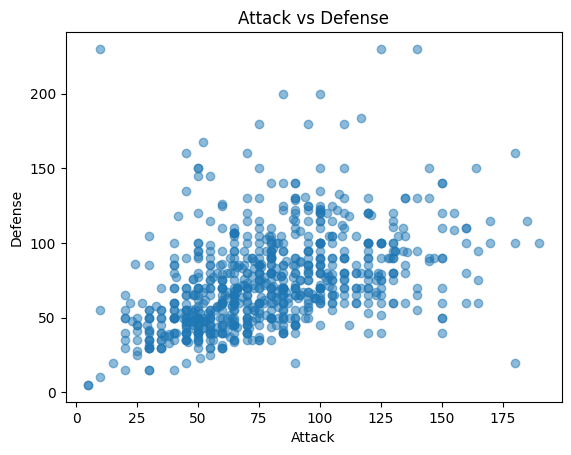

In [ ]:
# scatter plot between attack and defense
plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense')
plt.show()


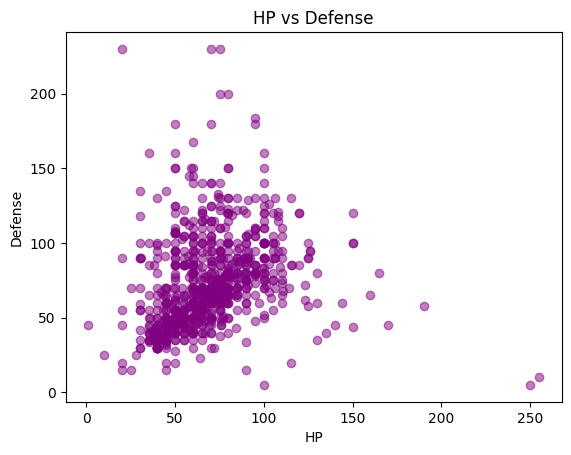

In [ ]:
# scatter plot between hp and defense
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color = 'purple', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('HP vs Defense')
plt.show()

In [ ]:
#Pearson correlation between attack and defense
pokemon_df['Attack'].corr(pokemon_df['Defense'])

0.4386870551184892

In [ ]:
#pearson correlation between speed and defense
pokemon_df['Speed'].corr(pokemon_df['Defense'])

0.015226598088597448

In [ ]:
#select only numeric columns
numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [ ]:
target_column = 'Attack'
correlation_results = {} # key = column, val = pearson_correlation

for column in numeric_columns.columns:
  if column != target_column:
    correlation = numeric_columns[column].corr(numeric_columns[target_column])
    correlation_results[column] = correlation

print(correlation_results)

{'Total': 0.7362106519949293, 'HP': 0.422386028776223, 'Defense': 0.4386870551184892, 'Sp. Atk': 0.39636175534923196, 'Sp. Def': 0.26398955110108846, 'Speed': 0.38123973924108967, 'Generation': 0.051451336708469686}


In [ ]:
# Correlation Matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


<Axes: >

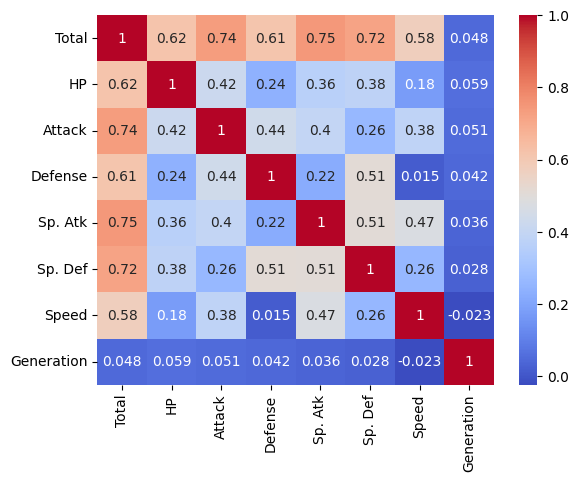

In [ ]:
# vizualization with seaborn
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Attack', ylabel='Defense'>

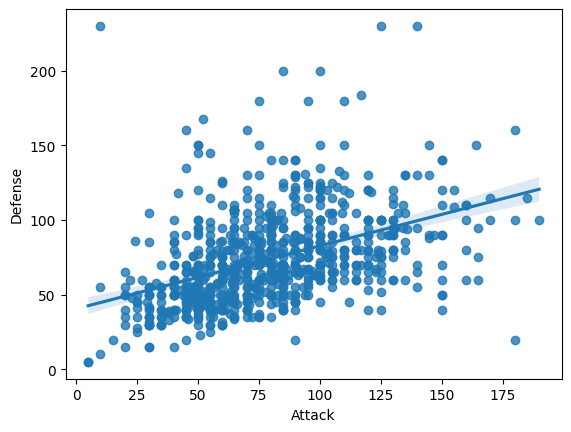

In [ ]:
#Linear regression(onevalue based on other)
sns.regplot(x = 'Attack', y='Defense', data=pokemon_df)

Text(0.5, 1.0, 'Speed vs Defense')

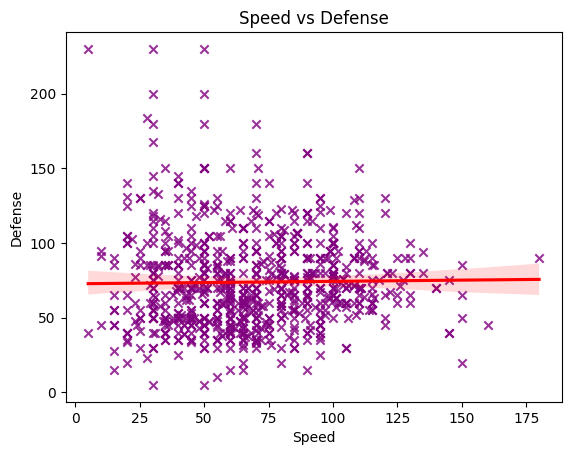

In [ ]:
sns.regplot(x='Speed', y='Defense', data=pokemon_df, color='purple', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Speed vs Defense')

Pearson correlation coefficient: 0.015226598088597448


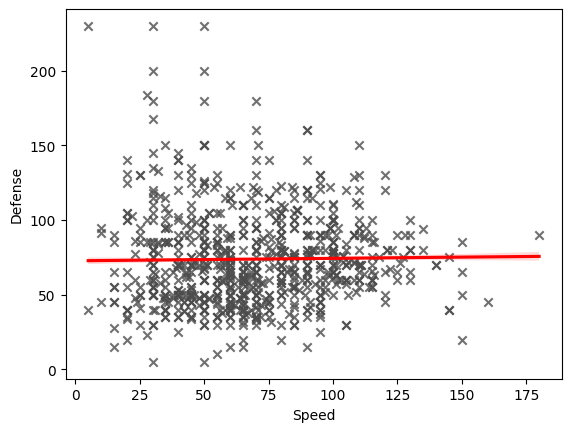

In [ ]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense",
    ci=50, marker="x", color=".3", line_kws=dict(color="r"),
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

In [ ]:
#Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.
#1. Create two DataFrame Grass and Water
Grass = pokemon_df[pokemon_df['Type 1'] == 'Grass']
Water = pokemon_df[pokemon_df['Type 1'] == 'Water']

<Axes: xlabel='Attack', ylabel='Defense'>

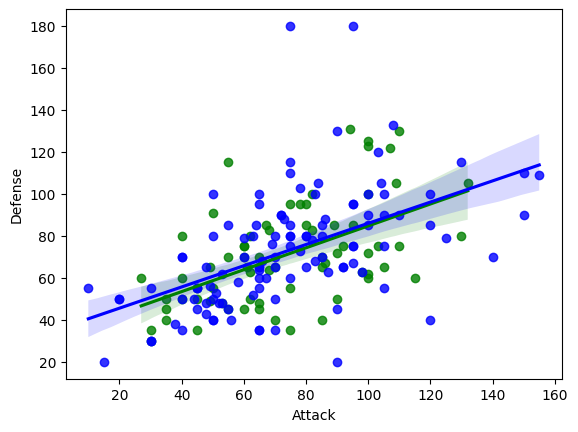

In [ ]:
#2. Create the regression plots for each (Grass and Water)
sns.regplot(data=Grass, x='Attack', y='Defense', color='green')
sns.regplot(data=Water, x='Attack', y='Defense', color='blue')


In [ ]:
#3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense
correlation_Grass = Grass['Attack'].corr(Grass['Defense'])
correlation_Water = Water['Attack'].corr(Water['Defense'])

print('Pearson correlation coefficient for Grass:', correlation_Grass)
print('Pearson correlation coefficient for Water:', correlation_Water)

Pearson correlation coefficient for Grass: 0.5407436570609248
Pearson correlation coefficient for Water: 0.5161628601933552
